In [2]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.model_selection import GridSearchCV 
from dm_tools import data_prep

# preprocessing step
df = data_prep()

# set the random seed - consistent
rs = 10

# train test split
y = df['ORGYN']
X = df.drop(['ORGYN'], axis=1)
X_mat = X.as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)

In [3]:
from sklearn.preprocessing import StandardScaler

# initialise a standard scaler object
scaler = StandardScaler()

# visualise min, max, mean and standard dev of data before scaling
print("Before scaling\n-------------")
for i in range(5):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))

# learn the mean and std.dev of variables from training data
# then use the learned values to transform training data
X_train = scaler.fit_transform(X_train, y_train)

print("After scaling\n-------------")
for i in range(5):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))

# use the statistic that you learned from training to transform test data
# NEVER learn from test data, this is supposed to be a set of dataset
# that the model has never seen before
X_test = scaler.transform(X_test)

Before scaling
-------------
Variable #0: min 18.0, max 79.0, mean 53.88 and std dev 12.73
Variable #1: min 1.0, max 30.0, mean 8.68 and std dev 3.33
Variable #2: min 0.0, max 39.0, mean 6.59 and std dev 4.63
Variable #3: min 0.0, max 1.0, mean 0.55 and std dev 0.50
Variable #4: min 0.0, max 1.0, mean 0.26 and std dev 0.44
After scaling
-------------
Variable #0: min -2.817928132600101, max 1.973020751934815, mean -0.00 and std dev 1.00
Variable #1: min -2.3038809726331317, max 6.393418630701979, mean 0.00 and std dev 1.00
Variable #2: min -1.4238631899138845, max 7.004782266234301, mean 0.00 and std dev 1.00
Variable #3: min -1.0958583346081323, max 0.9125267093555937, mean -0.00 and std dev 1.00
Variable #4: min -0.5960607165098256, max 1.6776814379842517, mean -0.00 and std dev 1.00


In [5]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=rs)

# fit it to training data
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=10, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
# training and test accuracy
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

# classification report on test data
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.8070197994343019
Test accuracy: 0.8138593070346483
             precision    recall  f1-score   support

          0       0.83      0.95      0.88      5015
          1       0.72      0.40      0.52      1652

avg / total       0.80      0.81      0.79      6667



In [7]:
print(model.coef_)

[[-0.6591935   0.81127285  0.00497785  0.38521978 -0.08566256 -0.39115952
  -0.00146557 -0.00243738  0.01202555  0.00920695  0.00304722  0.0090229
  -0.01529499 -0.00145279  0.00117342  0.01230641 -0.02685776  0.0214223
  -0.02536678 -0.0821813  -0.09111759 -0.08186314 -0.08751048 -0.07841712
  -0.06078479 -0.00731725  0.01528662 -0.01275671 -0.01024924  0.00922526
   0.01230641  0.01082943 -0.00397544 -0.0123164   0.00405814]]


In [8]:
feature_names = X.columns
coef = model.coef_[0]

# limit to 20 features, you can comment the following line to print out everything
coef = coef[:20]

for i in range(len(coef)):
    print(feature_names[i], ':', coef[i])

AGE : -0.6591934971588636
AFFL : 0.811272852541476
LTIME : 0.004977847683489086
GENDER_F : 0.385219775087291
GENDER_M : -0.08566255850669299
GENDER_U : -0.3911595240518934
TV_REG_Border : -0.001465574748248572
TV_REG_C Scotland : -0.0024373815796424406
TV_REG_East : 0.012025545741415043
TV_REG_London : 0.009206951392939988
TV_REG_Midlands : 0.0030472229069992735
TV_REG_N East : 0.009022904106581268
TV_REG_N Scot : -0.01529498899968212
TV_REG_N West : -0.0014527944050780409
TV_REG_S & S East : 0.0011734193104865195
TV_REG_S West : 0.012306408206768722
TV_REG_Ulster : -0.02685775591871214
TV_REG_Wales & West : 0.021422304367284407
TV_REG_Yorkshire : -0.025366777816794767
NGROUP_A : -0.08218129845118265


In [9]:
# grab feature importances from the model and feature name from the original X
coef = model.coef_[0]
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', coef[i])

AFFL : 0.811272852541476
AGE : -0.6591934971588636
GENDER_U : -0.3911595240518934
GENDER_F : 0.385219775087291
NGROUP_B : -0.09111759253395249
NGROUP_D : -0.08751048154458078
GENDER_M : -0.08566255850669299
NGROUP_A : -0.08218129845118265
NGROUP_C : -0.08186314402083018
NGROUP_E : -0.07841712213131105
NGROUP_F : -0.06078479239300229
TV_REG_Ulster : -0.02685775591871214
TV_REG_Yorkshire : -0.025366777816794767
TV_REG_Wales & West : 0.021422304367284407
TV_REG_N Scot : -0.01529498899968212
REGION_Midlands : 0.015286618470031307
REGION_North : -0.012756713189637926
CLASS_Silver : -0.012316404315860962
TV_REG_S West : 0.012306408206768722
REGION_South West : 0.012306408206768722


In [10]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

# use all cores to tune logistic regression with C parameter
cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10)
cv.fit(X_train, y_train)

# test the best model
print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.8065055284134739
Test accuracy: 0.8137093145342733
             precision    recall  f1-score   support

          0       0.83      0.95      0.88      5015
          1       0.73      0.40      0.51      1652

avg / total       0.80      0.81      0.79      6667

{'C': 0.01}


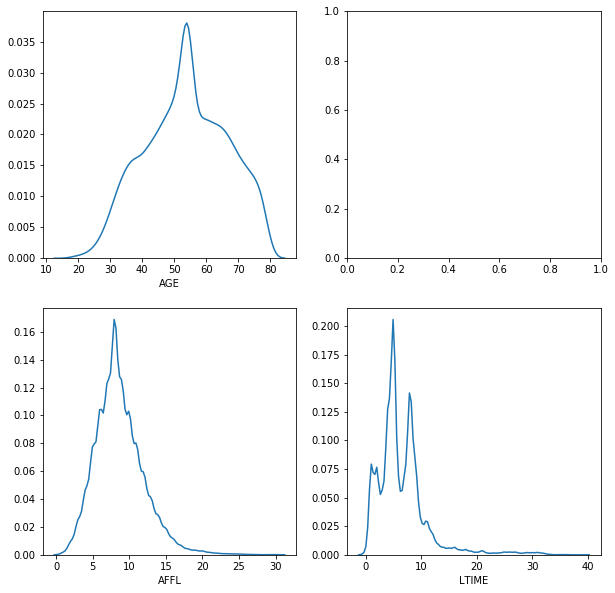

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_skewed_columns(df):
    # setting up subplots for easier visualisation
    f, axes = plt.subplots(2,2, figsize=(10,10), sharex=False)

    # gift avg plots
    sns.distplot(df['AGE'].dropna(), hist=False, ax=axes[0,0])
    sns.distplot(df['AFFL'].dropna(), hist=False, ax=axes[1,0])
    sns.distplot(df['LTIME'].dropna(), hist=False, ax=axes[1,1])

    plt.show()
    
plot_skewed_columns(df)

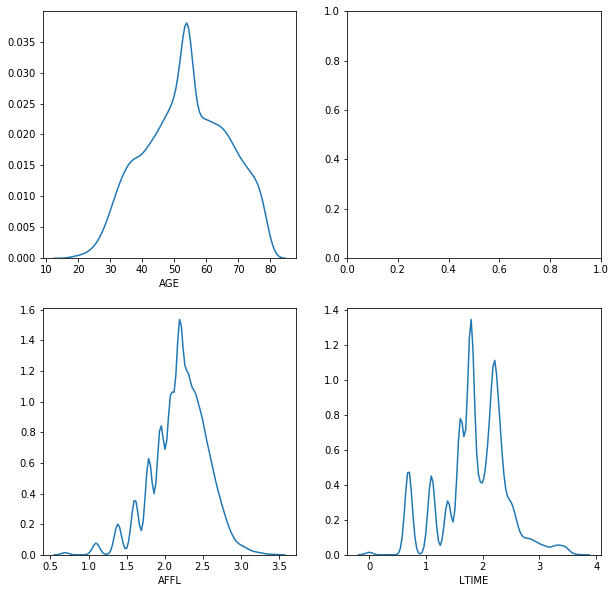

In [18]:
import numpy as np

# list columns to be transformed
columns_to_transform = ['AFFL', 'LTIME']

# copy the dataframe
df_log = df.copy()

# transform the columns with np.log
for col in columns_to_transform:
    df_log[col] = df_log[col].apply(lambda x: x+1)
    df_log[col] = df_log[col].apply(np.log)

# plot them again to show the distribution
plot_skewed_columns(df_log)

In [19]:
# create X, y and train test data partitions
y_log = df_log['ORGYN']
X_log = df_log.drop(['ORGYN'], axis=1)
X_mat_log = X_log.as_matrix()
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_mat_log, y_log, test_size=0.3, stratify=y_log, 
                                                                    random_state=rs)

# standardise them again
scaler_log = StandardScaler()
X_train_log = scaler_log.fit_transform(X_train_log, y_train_log)
X_test_log = scaler_log.transform(X_test_log)

In [21]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10)
cv.fit(X_train_log, y_train_log)

# test the best model
print("Train accuracy:", cv.score(X_train_log, y_train_log))
print("Test accuracy:", cv.score(X_test_log, y_test_log))

y_pred = cv.predict(X_test_log)
print(classification_report(y_test_log, y_pred))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.8080483414759578
Test accuracy: 0.8092095395230239
             precision    recall  f1-score   support

          0       0.82      0.95      0.88      5015
          1       0.71      0.39      0.50      1652

avg / total       0.80      0.81      0.79      6667

{'C': 0.001}


In [22]:
from sklearn.feature_selection import RFECV

rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10)
rfe.fit(X_train, y_train) # run the RFECV

# comparing how many variables before and after
print("Original feature set", X_train.shape[1])
print("Number of features after elimination", rfe.n_features_)

Original feature set 35
Number of features after elimination 22


In [23]:
X_train_sel = rfe.transform(X_train)
X_test_sel = rfe.transform(X_test)

In [24]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10)
cv.fit(X_train_sel, y_train)

# test the best model
print("Train accuracy:", cv.score(X_train_sel, y_train))
print("Test accuracy:", cv.score(X_test_sel, y_test))

y_pred = cv.predict(X_test_sel)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.8077269220879404
Test accuracy: 0.8131093445327734
             precision    recall  f1-score   support

          0       0.83      0.95      0.88      5015
          1       0.73      0.40      0.51      1652

avg / total       0.80      0.81      0.79      6667

{'C': 0.001}


In [26]:
# running RFE + log transformation
rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10)
rfe.fit(X_train_log, y_train_log) # run the RFECV on log transformed dataset

# comparing how many variables before and after
print("Original feature set", X_train_log.shape[1])
print("Number of features after elimination", rfe.n_features_)

# select features from log transformed dataset
X_train_sel_log = rfe.transform(X_train_log)
X_test_sel_log = rfe.transform(X_test_log)

# init grid search CV on transformed dataset
params = {'C': [pow(10, x) for x in range(-6, 4)]}
cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10)
cv.fit(X_train_sel_log, y_train_log)

# test the best model
print("Train accuracy:", cv.score(X_train_sel_log, y_train_log))
print("Test accuracy:", cv.score(X_test_sel_log, y_test_log))

y_pred_log = cv.predict(X_test_sel_log)
print(classification_report(y_test_log, y_pred_log))

# print parameters of the best model
print(cv.best_params_)

Original feature set 35
Number of features after elimination 5
Train accuracy: 0.8090768835176138
Test accuracy: 0.8117594120293985
             precision    recall  f1-score   support

          0       0.82      0.95      0.88      5015
          1       0.73      0.39      0.50      1652

avg / total       0.80      0.81      0.79      6667

{'C': 0.001}


In [27]:
from sklearn.tree import DecisionTreeClassifier

# similar parameters with the last practical
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(2, 7),
          'min_samples_leaf': range(20, 60, 10)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_train_log, y_train_log)

print(cv.best_params_)

{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 20}


In [28]:
from sklearn.feature_selection import SelectFromModel

# use the trained best decision tree from GridSearchCV to select features
# supply the prefit=True parameter to stop SelectFromModel to re-train the model
selectmodel = SelectFromModel(cv.best_estimator_, prefit=True)
X_train_sel_model = selectmodel.transform(X_train_log)
X_test_sel_model = selectmodel.transform(X_test_log)

print(X_train_sel_model.shape)

(15556, 3)


In [30]:
params = {'C': [pow(10, x) for x in range(-6, 4)]}

cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10)
cv.fit(X_train_sel_model, y_train_log)

print("Train accuracy:", cv.score(X_train_sel_model, y_train_log))
print("Test accuracy:", cv.score(X_test_sel_model, y_test_log))

# test the best model
y_pred = cv.predict(X_test_sel_model)
print(classification_report(y_test_log, y_pred))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.8088197480071998
Test accuracy: 0.8123593820308984
             precision    recall  f1-score   support

          0       0.82      0.95      0.88      5015
          1       0.73      0.38      0.50      1652

avg / total       0.80      0.81      0.79      6667

{'C': 0.0001}
